# Magnetic Susceptibility differences and Iron gene expression levels in GTS.

* Objective is to examine association between Striatal Magnetic Susceptibility statistical maps and the expression of iron-related gene-sets. 
<br><br>

* Analysis driven by         
    * **Romme, Biological Psychiatry, 2017:** Connectome Disconnectivity and Cortical Gene Expression in Patients With Schizophrenia
    * **Whitaker, PNAS, 2016:** Adolescence is associated with genomically patterned consolidation of the hubs of the human brain connectome.
    * **Wong, Cerebral Cortex, 2017:** Inter-Regional Variations in Gene Expression and Age-Related Cortical Thinning in the Adolescent Brain
    * **Shin, Cerebral Cortex, 2016:** Cell-Specific Gene-Expression Profiles and Cortical Thickness in the Human Brain
    * **Romero-Garcia, OHBM, 2017:** Gene expression analysis of structural cortical differences in autism
    * **Richiardi, Science, 2015:** Correlated gene expression supports synchronous activity in brain networks




In [117]:
%matplotlib inline
import os
import math 
import numpy as np
import pandas as pd 
import seaborn as sns
import random
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import pearsonr, spearmanr, gaussian_kde
from sklearn.decomposition import TruncatedSVD, PCA
from matplotlib.colors import rgb2hex
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 999

sns.set_style('white')
ahba_dir     = '/scr/malta3/workspace/project_iron/AHBA'
ahba_dir     = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/SEPT10/AHBA/'
ahba_dir2     = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/AUG27/AHBA/'
save_fig_dir = '/Users/kanaan/Google Drive/TS-EUROTRAIN/Papers/2016_QSM_paper/Figures_python_v2'

drop_strings = ['coords_native', 'donor_names', 'struct_id', 
                'struct_name', 'top_struct', 'Mean', 'Median', 
                'PC1', 'PC2','PC3', #'SVD1g', 'SVD2g','SVD3g', 'SVD3p', 'SVD2p','SVD3p', 
                'corrected_mni_x', 'corrected_mni_y', 'corrected_mni_z']

import warnings
warnings.filterwarnings('ignore')

# quality control
# drop wells outside the striatal masks 
drop_wells = [2371, 13913, 2379, 127687508]
drop_wells = [2371, 13913, 2379, 127687121]

# Lets be colour-full 

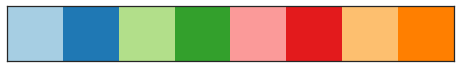

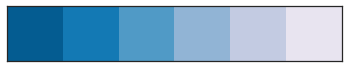

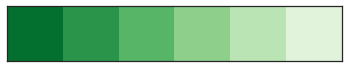

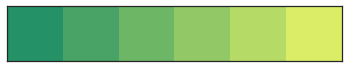

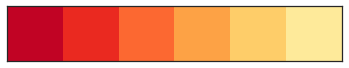

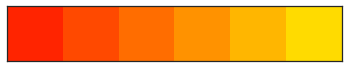

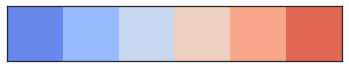

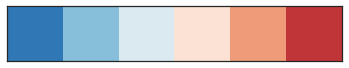

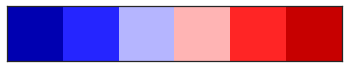

In [91]:
# colours
P = sns.color_palette("Paired",8)
B = sns.color_palette("PuBu_r")
G = sns.color_palette("Greens_r")
R = sns.color_palette("YlOrRd_r")
S = sns.color_palette("summer")
A = sns.color_palette("autumn")
C = sns.color_palette("coolwarm")
D = sns.color_palette("RdBu_r")

sns.palplot(P)
sns.palplot(B)
sns.palplot(G)
sns.palplot(S)
sns.palplot(R)
sns.palplot(A)
sns.palplot(C)
sns.palplot(D)
sns.palplot(sns.color_palette("seismic"))

# Geneset contents

In [92]:
##################################################################################################
# Genesets 
##################################################################################################

GS_IRON_H   = ['FTH1','FTL' ,'HFE','HFE2','IL1A', 'IL6', 'IL6R','IREB2','SLC40A1','TF','TFR2','TNF',]
GS_IRON_D = ['THRSP', 'TF', 'MAL', 'KLK6', 'HOMER1', 'MOBP', 'APOD', 'MOG', 'CRYAB', 'APOC1', 'CA2', 'RASGRP1', 
          'STMN4', 'LYZ','GSTM1', 'CTSS',  'DCK' ]

GS_IRON_IH = ['ABCB6', 'ABCB7', 'ABCG2', 'ACO1', 'ALAS2', 'BMP6', 'CP', 'CYBRD1',  'FLVCR1', 'FTH1',  'FTHL17',
                        'FTL', 'FTMT', 'FXN', 'GDF2', 'HAMP', 'HEPH', 'HFE', 'HFE2', 'HIF1A', 'HMOX1', 'HMOX2', 'HPX', 'IREB2', 'ISCU', 'LCN2',
                        'LTF', 'MYC', 'NDFIP1', 'NUBP1', 'SCARA5', 'SLC11A1', 'SLC11A2', 'SLC22A17', 'SLC40A1', 'SLC46A1', 'SMAD4', 'SOD1',
                        'SRI', 'TF', 'TFR2', 'TFRC', 'TMPRSS6', 'TTC7A']

GS_IRON_IM = ['HFE', 'MFI2', 'PICALM', 'SLC11A2', 'STEAP1', 'STEAP1B', 'STEAP2', 'STEAP3', 'STEAP4', 'TF', 
              'TFR2', 'TFRC']

GS_IRON_T1 = ['ABCB6', 'ABCB7', 'ABCG2', 'FLVCR1', 'FLVCR2', 'HPX', 'HRG', 'LCN2',
                   'SLC22A17', 'SLC46A1', 'SLC48A1']
GS_IRON_T2 = ['ABCG2', 'ATP6V0A2', 'ATP6V0A4', 'ATP6V0B', 'ATP6V0C', 'ATP6V0D1', 'ATP6V0D2', 'ATP6V0E1', 'ATP6V1A',
              'ATP6V1B1', 'ATP6V1B2', 'ATP6V1C1', 'ATP6V1C2', 'ATP6V1D', 'ATP6V1E1', 'ATP6V1E2', 'ATP6V1F', 'ATP6V1G1',
              'ATP6V1G2', 'ATP6V1G3', 'ATP6V1H', 'CP', 'CYBRD1', 'FLVCR1', 'FTH1', 'FTL', 'HEPH', 'HMOX1', 'HMOX2',
              'MCOLN1', 'SLC40A1', 'SLC46A1', 'STEAP3', 'TCIRG1', 'TF', 'TFRC']

GS_IRON_R = ['ABAT', 'ABCG2', 'ACO1', 'ALAD', 'APBB1', 'ATP7A', 'B2M', 'BCL2', 'BMP6', 'C1QA', 'CCNB1', 'CCND1',
             'CPOX', 'CYBRD1', 'CYP1A1', 'DRD2', 'FXN', 'GSK3B', 'HAMP', 'HFE', 'HMOX1', 'LCT', 'MDM2', 'PAWR',
             'PDX1', 'SLC11A2', 'SLC40A1', 'SLC6A3', 'SNCA', 'TF', 'TFAP2A', 'TFF1', 'TFR2', 'TFRC', 'UROD']



GS_DA     = ['COMT', 'DDC', 'MAOA', 'MAOB', 'NQO1', 'PPP2CA', 'PPP2CB', 'PRKACA', 'PRKACB','PRKACG', 'TH', 'TYR']
GS_DA_receptor_bind = ['GNA13', 'DLG4', 'DNM1', 'DNM2','DRD1', 'DRD3','GNA12','GNAS',  'ARRB2', 'ATP1A3', 'PALM', 
                    'CLIC6', 'PTPN11', 'PPP1R1B', 'DNAJC14', 'CAV2', 'SLC9A3R1']
GS_DA_receptor_sig  = ['ADCY5', 'ADCY6', 'ARRB2', 'CALY','DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5', 'FLNA', 
                   'GNA11', 'GNA14', 'GNA15', 'GNAI3', 'GNAL', 'GNAO1', 'GNAQ', 'GNAS', 'GNB1', 'GNG2', 
                   'GPR21', 'GPR52', 'GSK3A', 'GSK3B', 'HMP19', 'KLF16', 'OPRM1', 'RGS9', 'SLC9A3R1']
GS_DA_transport     = ['CHRM5','DRD1','PARK2','PARK7','SLC18A2','SLC22A1','SLC22A2','SLC22A3', 'SLC6A2',
                    'SLC6A3','SNCA']
GS_DA_transmission  = ['CDK5','CRH','CRHBP','DRD1','DRD2','DRD3','DRD4','DRD5','RASD2','TH']
GS_ANMC = ['ME1', 'ALDH5A1', 'GBE1', 'GALM', 'PYGL', 'CPS1','PFKFB3', 'PYGB', 'IDH2', 'ENO1','PPP1R1A', 
        'MDH2', 'CS','PYGM', 'PGM3', 'PHKG1', 'SLC3A2', 'PFKFB4', 'KHK','LDHB', 'PCK2','SLC2A8',  'PGM2', 
        'GPT','AKR1B1', 'NANS', 'PDK4','OGDHL','DHTKD1', 'PFKM', 'PGM1', 'PC','AGL']
GS_GLU  = ['UNC13B', 'RIMS1', 'GLS2', 'GLS', 'SLC38A2', 'SLC17A7', 'RAB3A', 'SLC1A1', 'SLC1A6', 'SLC1A7', 
        'SNAP25', 'STX1A', 'STXBP1','VAMP2', 'SYT1' ]
GS_GABA = ['GPHN', 'GABARAP','DNM1', 'GABRA1', 'GABRA2', 'GABRA3', 'GABRA4','GABRA5','GABRA6''SRC'] 
GS_GABA_GLU = GS_GLU + GS_GABA
GS_TF       = ['TF']
GS_FTH      = ['FTH1']
GS_FTL      = ['FTL']
GS_HRE      = ['HFE']
GS_HRE2     = ['HFE2']
GS_SLC25    = ['SLC25A37']
GS_SLC40    = ['SLC40A1']
GS_BIOBANK  = GS_TF + GS_FTH + GS_HRE + GS_SLC25
GS_FTH_ALL  = ['FTH1', 'FTH1P14', 'FTH1P20', 'FTHL17' ]
GS_FTL_ALL  = ['FTL', 'FTLP17']
GS_FERRITIN = GS_FTH_ALL + GS_FTL_ALL + ['FTMT']

GS_TCA = ['ACLY', 'ACO1', 'ACO2', 'CS', 'DLAT', 'DLD', 'DLST', 'FH', 'IDH1', 'IDH2', 'IDH3A', 'IDH3B',
      'IDH3G', 'LOC283398', 'LOC642502', 'MDH1', 'MDH2', 'OGDH', 'OGDHL', 'PC',  'PCK1',  'PCK2',
     'PDHA1', 'PDHA2', 'PDHB', 'SDHA', 'SDHB', 'SDHC', 'SDHD', 'SUCLA2', 'SUCLG1', 'SUCLG2']

GS_BTBD9 = ['BTBD9']
GS_ACO1 = ['ACO1']
GS_ACO2 = ['ACO2']
GS_ACO =  GS_ACO1+ GS_ACO2

# Read Geneset Expression Values
* Each dataframe contrains expression values from each sampling well, total wells = 3702 
* Each Well corresponds to an MNI coordinate
* For each gene, expression was calculate as the average of all probes
* 5 principal components were also extracted for each geneset of interest (IRON,IRON_D,ANMC)

In [93]:
def return_expression_df(geneset):
    return pd.read_csv(os.path.join(ahba_dir, 'AHBA_%s.csv'%geneset),index_col=0)

IRON_H           = return_expression_df('IRON_HOMEOSTASIS_PCA')
IRON_D           = return_expression_df('IRON_D_PCA')
IRON_IH          = return_expression_df('IRON_ION_HOMEOSTASIS_PCA')
IRON_IM          = return_expression_df('IRON_ION_IMPORT_PCA')
IRON_IB          = return_expression_df('IRON_ION_BINDING_PCA')
IRON_T1          = return_expression_df('IRON_TRANSPORT1_PCA')
IRON_T2          = return_expression_df('IRON_TRANSPORT2_PCA')
IRON_R           = return_expression_df('IRON_RESPONSE_PCA')
ANMC             = return_expression_df('ANMC_PCA')
DA_met           = return_expression_df('DA_metabolism_PCA')
DA_receptor_sig  = return_expression_df('DA_receptor_sig_PCA')
DA_receptor_bind = return_expression_df('DA_receptor_PCA')
DA_transmission  = return_expression_df('DA_tranmission_PCA')
DA_transport     = return_expression_df('DA_transport_PCA')
ANMC             = return_expression_df('ANMC_PCA')
GLU              = return_expression_df('GLU_PCA')
GABA             = return_expression_df('GABA_PCA')
GLU_GABA         = return_expression_df('GLU_GABA_PCA')
FTH_ALL          = return_expression_df('FTH_ALL_PCA')
FERRITIN         = return_expression_df('FERRITIN_PCA')
FTL_ALL          = return_expression_df('FTL_ALL')
TF               = return_expression_df('TF')
FTH              = return_expression_df('FTH')
FTL              = return_expression_df('FTL')
HRE              = return_expression_df('HFE')
HRE2             = return_expression_df('HFE2')
SLC25            = return_expression_df('SLC25')
BIOBANK          = return_expression_df('BIOBANK_PCA')
BTBD9            = return_expression_df('BTBD9') 
TCA              = return_expression_df('TCA_PCA') 
ACO              = return_expression_df('ACO') 
ACO1             = return_expression_df('ACO1') 
ACO2             = return_expression_df('ACO2') 
HOUSEKEEPING     = return_expression_df('HOUSEKEEPING') 
HOUSEKEEPING_E   = return_expression_df('HOUSEKEEPING_EISENBERG') 
DA_allen         = return_expression_df('DA_allen_PCA')
DAT1             = return_expression_df('DAT1')
DRD1             = return_expression_df('DRD1')
DRD2             = return_expression_df('DRD2')
DRD3             = return_expression_df('DRD3')
DRD4             = return_expression_df('DRD4')
DRD_ALL          = return_expression_df('DRD_ALL_PCA')



# Read QSM statistical map (represents susceptibility [iron] differences)
* The statistical maps represents susceptibility differences between Healthy controls (N=26) and GTS patients (N=23).
* Maps were calculated with a two sample t-test using 10,000 permutations,threshold- free cluster enhancement, and FWE correction.
* ROIs include L/R_Caud, L/R_Putamen, L/R_Pallidum, STR3_MOTOR, STR3_EXEC, STR3_LIMBIC

In [94]:
df_MNI10 = pd.read_csv(os.path.join(ahba_dir,'QSM_TSTATS/MNI_NIFTI_VALUES_permute_10K_SEPT10.csv'), index_col = 0 )
df_MNI = pd.read_csv(os.path.join(ahba_dir,'QSM_TSTATS/MNI_NIFTI_VALUES_permute_10K_SEPT22.csv'), index_col = 0 )

In [95]:
pd.concat([df_MNI10.STR3_MOTOR_tfce_corrp_tstat_CP_2.dropna(),
           df_MNI.STR3_MOTOR_tfce_corrp_tstat_CP_2mm.dropna()], axis = 1)

,STR3_MOTOR_tfce_corrp_tstat_CP_2,STR3_MOTOR_tfce_corrp_tstat_CP_2mm
139379756,0.712300,0.712300
126432120,0.004500,0.004500
127687931,0.478262,0.478262
127687867,0.278367,0.278367
126439301,0.930858,0.930858
139379739,0.073200,0.073200
1028,0.551331,0.551331
977,0.388735,0.388735
2209,0.739811,0.739811
2233,0.675506,0.675506


# Concatenate Dataframes

In [96]:
def concat_dfs(measure):
    df  = pd.DataFrame(index = IRON_H.index, 
                        columns = ['IRON', 'IRON_D', 'DA_met', 'DA_receptor_bind', 'DA_receptor_sig', 
                                   'DA_transmission', 'DA_transport', 'ANMC', 'GLU', 'GABA', 'GLU_GABA', 
                                   'TF', 'FTH', 'FTL', 'HRE', 'HRE2', 'SLC25', 'SLC40', 'BIOBANK',
                                   'BTBD9', 'TCA', 'ACO','ACO1', 'ACO2', 'HOUSEKEEPING', 'HOUSEKEEPING_E',
                                   'top_struct', 'struct'])
    xval = 1
    df['top_struct']        = IRON_H.top_struct
    df['struct']            = IRON_H.struct_name
    df['IRON_H']            = IRON_H[measure] * xval
    df['IRON_D']            = IRON_D[measure]
    df['IRON_IH']           = IRON_IH[measure] * xval
    df['IRON_IM']           = IRON_IM[measure] * xval
    df['IRON_IB']           = IRON_IB[measure] * xval
    df['IRON_T1']           = IRON_T1[measure] * xval
    df['IRON_T2']           = IRON_T2[measure] * xval
    df['IRON_R']            = IRON_R[measure] * xval
    df['DA_met']            = DA_met[measure] * xval
    df['DA_receptor_bind']  = DA_receptor_bind[measure] * xval
    df['DA_receptor_sig']   = DA_receptor_sig[measure] * xval
    df['DA_transmission']   = DA_transmission[measure] * xval
    df['DA_transport']      = DA_transport[measure] * xval
    df['ANMC']              = ANMC[measure] * xval
    df['GLU']               = GLU[measure] * xval
    df['GABA']              = GABA[measure] * xval
    df['GLU_GABA']          = GLU_GABA[measure] * xval
    df['FTH_ALL']           = FTH_ALL[measure] * xval    
    df['FERRITIN']          = FERRITIN[measure] * xval    
    df['TCA']               = TCA[measure] * xval
    df['DA_allen']          = DA_allen[measure] * xval
    df['DRD_ALL']           = DRD_ALL[measure] * xval
    
    if measure not in ['PC1', 'PC2', 'PC3', 'SVD1g','SVD2g', 'SVD3p', 'SVD1p','SVD2p', 'SVD3p']: 
        df['FTL_ALL']           = FTL_ALL[measure] * xval    
        df['TF']                = TF['TF'] * xval
        df['FTH']               = FTH['FTH1'] * xval
        df['FTH1P14']           = FERRITIN['FTH1P14'] * xval    
        df['FTH1P20']           = FERRITIN['FTH1P20'] * xval    
        df['FTHL17']            = FERRITIN['FTHL17'] * xval    
        df['FTL']               = FTL['FTL'] * xval
        df['HFE']               = HRE['HFE'] * xval
        df['HFE2']              = HRE2['HFE2'] * xval
        df['SLC25']             = SLC25['SLC25A37'] * xval
        df['BTBD9']             = BTBD9['BTBD9'] * xval
        df['ACO']               = ACO[measure] * xval
        df['ACO1']              = ACO1['ACO1'] * xval
        df['ACO2']              = ACO2['ACO2'] * xval
        df['BIOBANK']           = BIOBANK[measure] * xval
        df['HOUSEKEEPING']      = HOUSEKEEPING[measure] * xval
        df['HOUSEKEEPING_E']    = HOUSEKEEPING_E[measure] * xval
        df['DAT1']              = DAT1['SLC6A3'] * xval
        df['DRD1']              = DRD1['DRD1'] * xval
        df['DRD2']              = DRD2['DRD2'] * xval
        df['DRD3']              = DRD3['DRD3'] * xval
        df['DRD4']              = DRD4['DRD4'] * xval
        
    dfc = pd.concat([df_MNI, df], axis = 1)
    return dfc

df_SVD1g  = concat_dfs('SVD1g')
df_SVD2g  = concat_dfs('SVD2g')
df_SVD1p  = concat_dfs('SVD1p')
df_SVD2p  = concat_dfs('SVD2p')
#df_SVD3  = concat_dfs('SVD3')
df_PC1   = concat_dfs('PC1')
df_PC2   = concat_dfs('PC2')
df_PC3   = concat_dfs('PC3')
df_MU    = concat_dfs('Mean')

# Fixed Effect Correlations

In [97]:
rois = ['Caud',
        'Puta',
        'STR3_MOTOR', 
        'STR3_EXEC', 
        'STR3_LIMBIC', 
       ]

def detect_outlier_subjects(df,measure,m=2):
    upper = np.mean(df[measure]) + m * np.std(df[measure])
    lower = np.mean(df[measure]) - m * np.std(df[measure])
    outliers = []
    for subject in df.index:
        if df.loc[subject][measure] > upper:
            outliers.append(subject) 
        elif df.loc[subject][measure] < lower:
            outliers.append(subject) 
    #print outliers,measure
    return outliers

def make_corr(DF, met1,met2, color, annotate=0):
    DF = DF
    dfx = pd.DataFrame(index=DF.index)
    dfx[met1]  = DF[met1]  #* 10
    dfx[met2]  = DF[met2]
    
    dfx = dfx.drop([2371, 13913, 2379, 127687121],axis=0).dropna()
    #dfx = dfx.drop([159226077, 127687121],axis=0).dropna()
    r_val = np.round(pearsonr(dfx[met1], dfx[met2])[0],2)
    p_val = np.round(pearsonr(dfx[met1], dfx[met2])[1],10)
    #print len(dfx), r_val, p_val

    if p_val < 1:
        print met1, met2[0:6], r_val, p_val
        grid = sns.JointGrid(met1, met2, data=dfx)#,xlim=xlim, ylim=ylim)#, size=size, ratio=ratio, space=space, #) 
        grid.plot_marginals(sns.distplot, color = color, hist=0, kde = 1, kde_kws={'shade':1})
                            #rug = 1, rug_kws = {'height':0.1})  
        grid.plot_joint(sns.regplot, fit_reg=1, scatter= 1, color = color)#, 
                    #ci = 95, line_kws={'linestyle': lstyle, 'lw':lw}, scatter_kws={"s": 25})
        #sns.jointplot(met1, met2,dfx, kind = 'reg', color=color)
        #plt.vlines(0,5,7.5)
        #plt.set_axis_labels()
        #if annotate:
        #    plt.annotate('R=%s, P=%s' %(r_val, p_val), xy = annotate, fontsize = 13,  color='r')
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks(fontsize=12, weight='bold')
        plt.yticks(fontsize=12, weight='bold')
        #plt.ylim(-.5,1.5)
        #plt.xlim(-30,50)
        #plt.savefig(os.path.join(save_fig_dir, 'gorter_corr_%s_%s.png' %(met1,met2)), dpi = 300,
        #            bbox_inches='tight', transparent = True)

    return dfx


### Geneset-PC1 vs Striatal-Motor Suscspibility reductions 

IRON_H STR3_M 0.39 0.0017513571
IRON_D STR3_M 0.46 0.0001475414
IRON_T2 STR3_M 0.35 0.0051191362
FERRITIN STR3_M 0.5 3.3031e-05


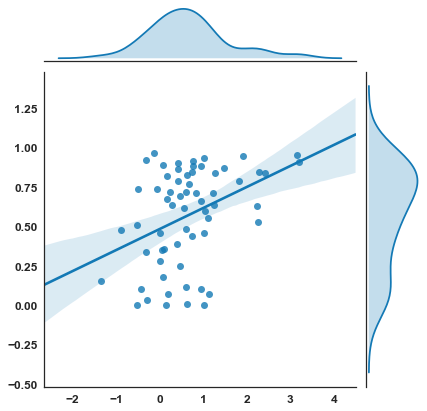

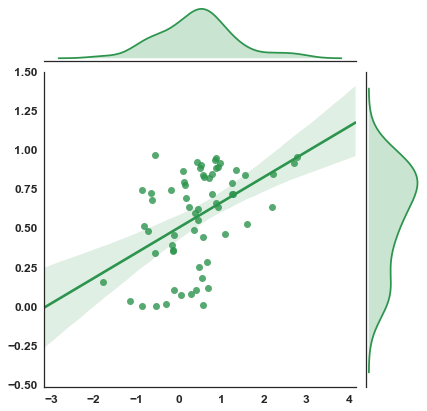

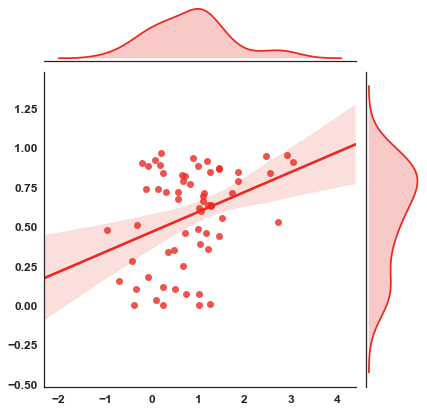

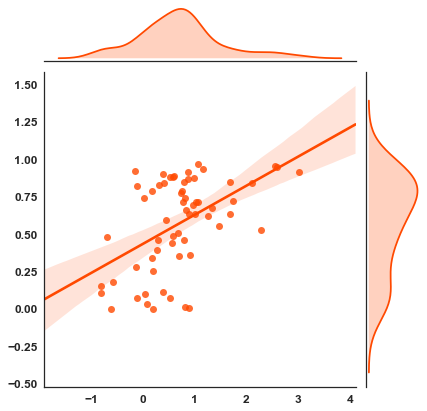

In [98]:
#for roi in ['STR3_MOTOR_tstat_CP_2mm']:
for roi in ['STR3_MOTOR_tfce_corrp_tstat_CP_2mm']:
    dfx_iron_h  = make_corr(df_PC1,'IRON_H', roi,B[1], (0.14,1.4))
    dfx_iron_d  = make_corr(df_PC1,'IRON_D', roi,G[1], (0.14,1.4))
    dfx_iron_t2 = make_corr(df_PC1,'IRON_T2', roi,R[1], (65,1.4))
    dfx_ferr    = make_corr(df_PC1,'FERRITIN', roi,A[1], (65,1.4))

IRON_H STR3_M 0.32 0.0004376393
IRON_D STR3_M 0.31 0.0006854821
IRON_T2 STR3_M 0.32 0.0005477261
FERRITIN STR3_M 0.37 4.95991e-05


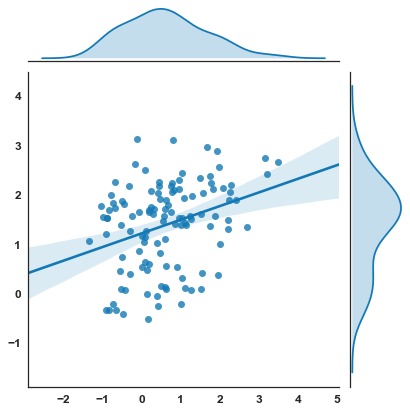

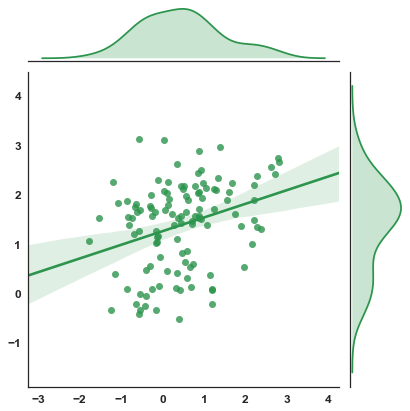

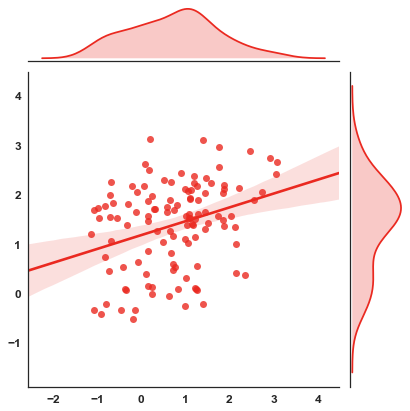

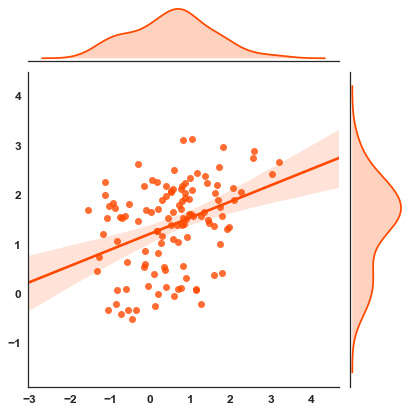

In [99]:
#for roi in ['STR3_MOTOR_tstat_CP_2mm']:
for roi in ['STR3_MOTOR_Pall_tstat_CP_2mm']:
    dfx_iron_h  = make_corr(df_PC1,'IRON_H', roi,B[1], (0.14,1.4))
    dfx_iron_d  = make_corr(df_PC1,'IRON_D', roi,G[1], (0.14,1.4))
    dfx_iron_t2 = make_corr(df_PC1,'IRON_T2', roi,R[1], (65,1.4))
    dfx_ferr    = make_corr(df_PC1,'FERRITIN', roi,A[1], (65,1.4))

### Geneset-Mean vs Striatal-Motor Suscspibility reductions

IRON_H STR3_M 0.28 0.0153100678
IRON_D STR3_M 0.36 0.0017375982
IRON_T2 STR3_M 0.41 0.0002235727
FERRITIN STR3_M 0.44 8.39952e-05


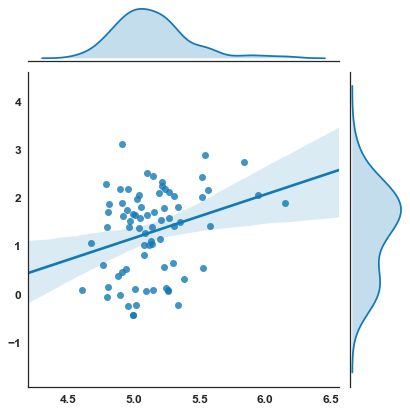

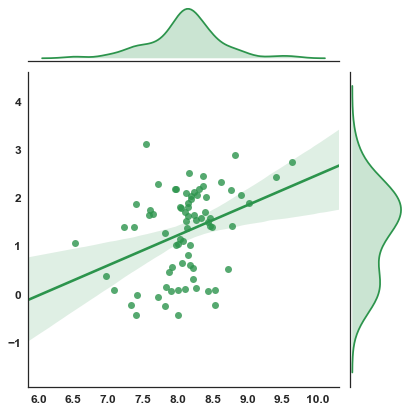

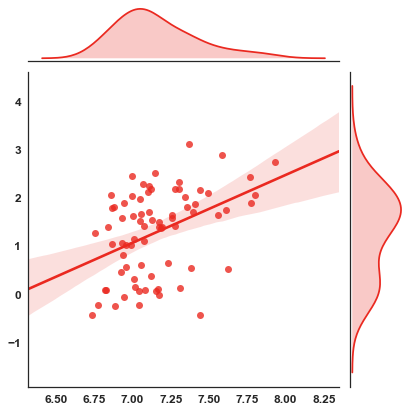

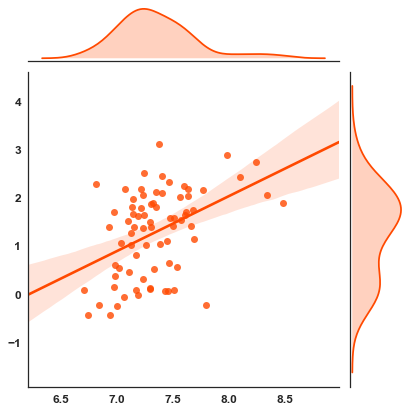

In [100]:
for roi in ['STR3_MOTOR_tstat_CP_2mm']:
    dfx_iron_h  = make_corr(df_MU,'IRON_H', roi,B[1], (0.14,1.4))
    dfx_iron_d  = make_corr(df_MU,'IRON_D', roi,G[1], (0.14,1.4))
    dfx_ferr = make_corr(df_MU,'IRON_T2', roi,R[1], (65,1.4))
    dfx_ferr = make_corr(df_MU,'FERRITIN', roi,A[1], (65,1.4))


IRON_H STR3_M 0.26 0.0047376745
IRON_D STR3_M 0.31 0.0007076208
IRON_T2 STR3_M 0.34 0.0001894273
FERRITIN STR3_M 0.33 0.0002830147


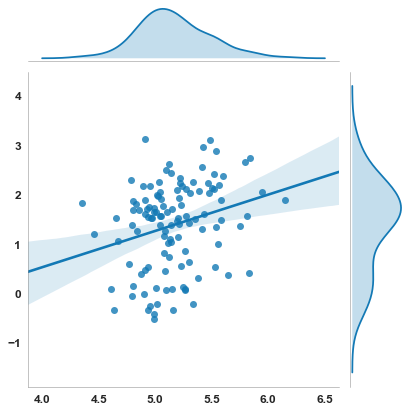

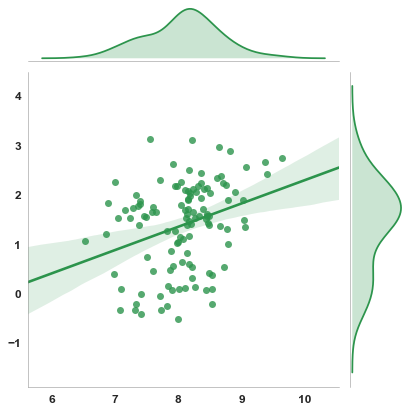

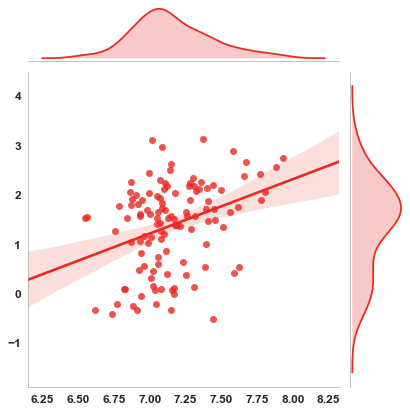

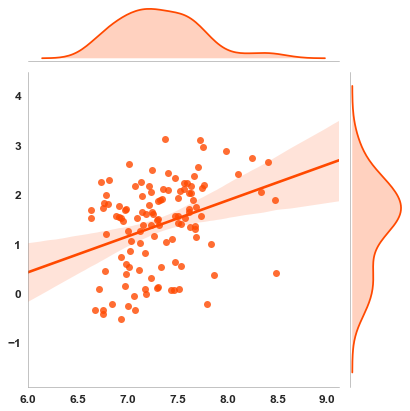

In [106]:
for roi in ['STR3_MOTOR_Pall_tstat_CP_2mm']:
    dfx_iron_h  = make_corr(df_MU,'IRON_H', roi,B[1], (0.14,1.4))
    dfx_iron_d  = make_corr(df_MU,'IRON_D', roi,G[1], (0.14,1.4))
    dfx_ferr = make_corr(df_MU,'IRON_T2', roi,R[1], (65,1.4))
    dfx_ferr = make_corr(df_MU,'FERRITIN', roi,A[1], (65,1.4))

# Inspect PCA Loadings 

In [102]:
from math import pi
import matplotlib.pyplot as plt

def plot_loadings(gset, C, sorter='PC1'):
    # Set data
    if sorter != 'PC1':
        sorter = sorter
    loadings = pd.read_csv(os.path.join(ahba_dir,'loadings_%s.csv'%gset), 
                           index_col=0).sort_values(sorter, ascending=0)

    loading_index = [i for i in loadings.index]
    cat = loading_index
    values = list(loadings['PC1']) # [90, 60, 65, 70, 40]
    values2 = list(loadings['PC2']) # [90, 60, 65, 70, 40]
    values3 = list(loadings['PC3']) # [90, 60, 65, 70, 40]
    #values4 = list(loadings.PC4) # [90, 60, 65, 70, 40]

    N = len(cat)
    x_as = [n / float(N) * 2 * pi for n in range(N)]

    # Because our chart will be circular we need to append a copy of the first 
    # value of each list at the end of each list with data
    values.append(list(loadings['PC1'])[0])
    values = np.abs(np.array(values))

    values2.append(list(loadings['PC2'])[0])
    values2 = np.abs(np.array(values2))

    values3.append(list(loadings['PC3'])[0])
    values3 = np.abs(np.array(values3))


    x_as += x_as[:1]

    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")

    # Create polar plot
    fig = plt.figure(figsize=(20,20))
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)

    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    #Set position of y-labels
    ax.set_rlabel_position(0)

    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=1)
    ax.yaxis.grid(True, color="#888888", linestyle='dashed', linewidth=1)##888888

    # Set number of radial axes and remove labels
    plt.xticks(x_as[:-1], loading_index, size = 25,weight='bold')
    #plt.xticks(x_as[:-1], [])

    # Set yticks
    #plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])

    alpha =0.75
    ax.fill(x_as, values,  rgb2hex(C[1]), alpha=alpha)
    ax.fill(x_as, values2, rgb2hex(C[3]), alpha=alpha)
    ax.fill(x_as, values3, rgb2hex(C[5]), alpha=alpha)
    #ax.fill(x_as, values4, 'm', alpha=0.5)

    plt.tick_params(axis='y', direction='in', labelsize=15)
    plt.tick_params(axis='x', direction='in', labelsize=15)
    plt.savefig(os.path.join(save_fig_dir, 'loadings_%s.png'%gset), dpi = 300, bbox_inches='tight', transparent=1)


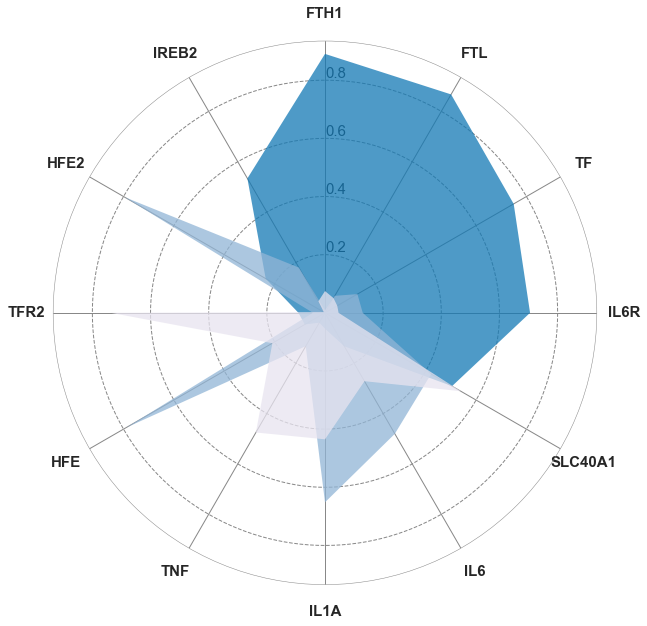

In [103]:
plot_loadings('IRON_HOMEOSTASIS', B)

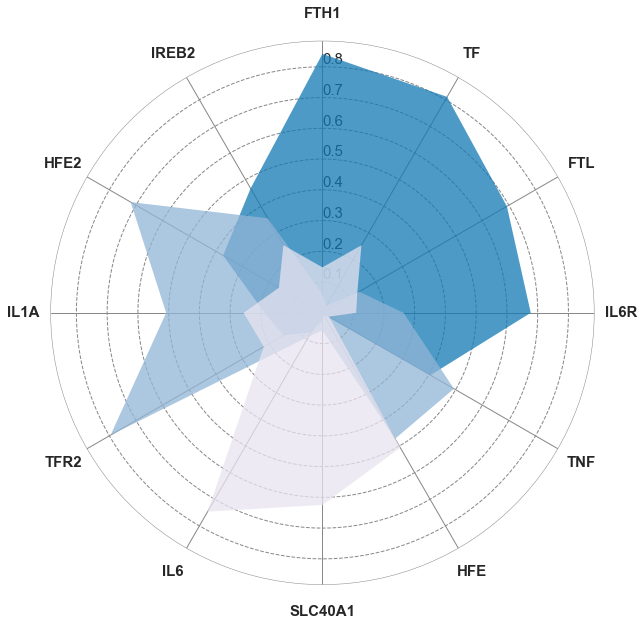

In [126]:
plot_loadings('STR_IRON_H', B)



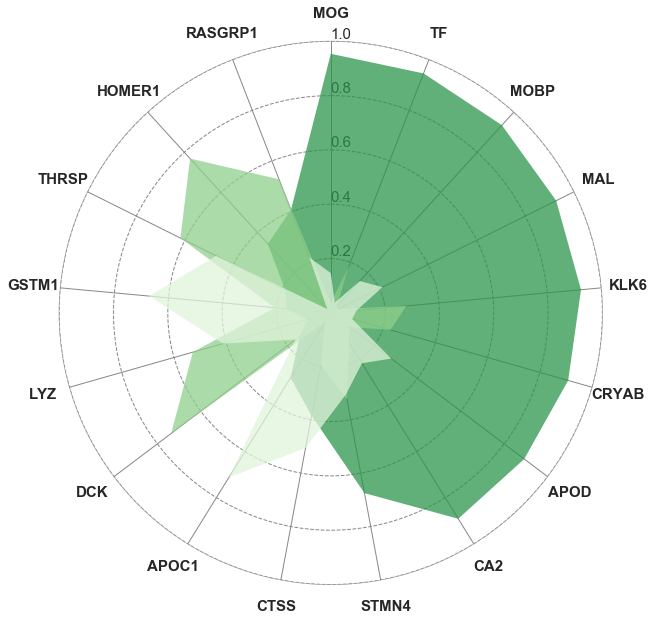

In [28]:
plot_loadings('IRON_D', G)

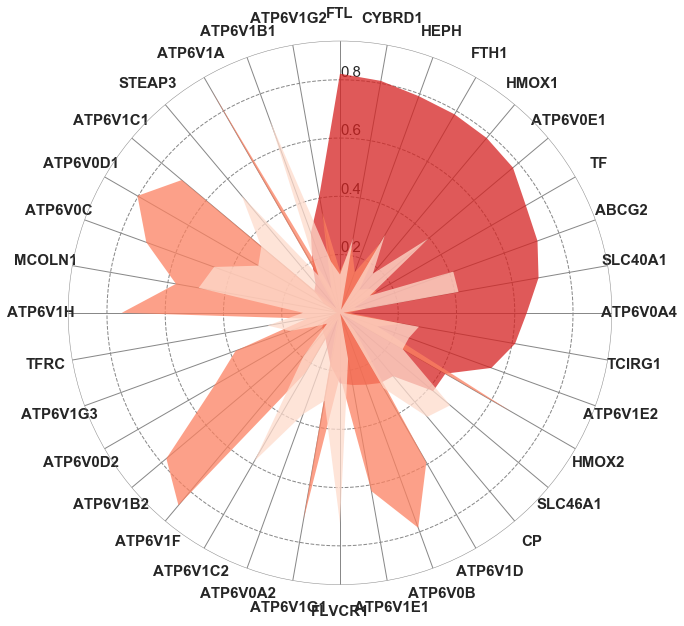

In [29]:
plot_loadings('IRON_TRANSPORT2', sns.color_palette("Reds_r"))

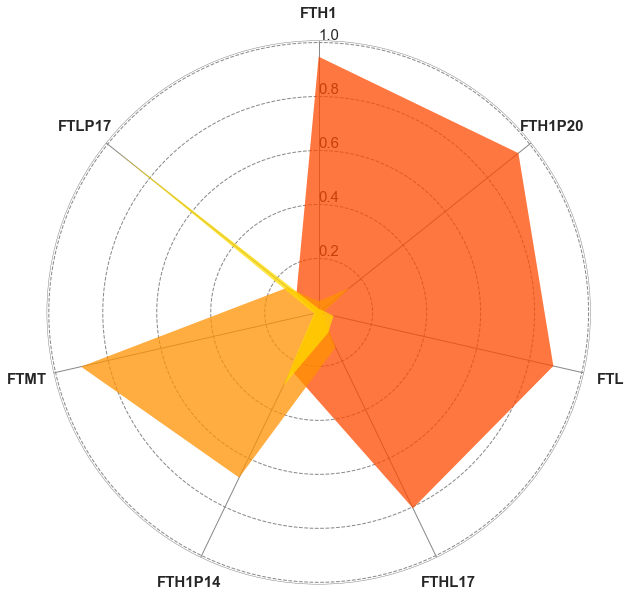

In [30]:
plot_loadings('FERRITIN', A)

# PERMUTATIONS


* To statisticaly evaluate the observed correlations, we examined whether an observed correlation was higher than one could expect under the null-condition.
* The observed correlation for a specific geneset/susceptibilit correlation was tested against a null distribution of correlations.
* 10,000 permutations were used. 
* For each permutation, expression values were extracted from a similar number of genes. 
* The null hypothesis at the 5% FDR-adjusted significance level correcting for multiple testing of X-comparisons. 

# Read expression values of entire AHBA database (still missing many genes)

In [107]:
# Concat ahba genes 
ahba_a = return_expression_df('18589_a').drop(drop_strings,axis =1)
ahba_b = return_expression_df('18589_b').drop(drop_strings,axis =1)
ahba_c = return_expression_df('18589_c').drop(drop_strings,axis =1)
ahba_d = return_expression_df('18589_d').drop(drop_strings,axis =1)
ahba_e = return_expression_df('18589_e').drop(drop_strings,axis =1)
ahba_f = return_expression_df('18589_f').drop(drop_strings,axis =1)
ahba_g = return_expression_df('18589_g')
AHBA   = pd.concat([ahba_a, ahba_b, ahba_c, ahba_d, ahba_e, ahba_f, ahba_g], axis =1)
AHBA   = AHBA#.rename(columns={"struct_name": "struct"}) # Dont change struct name here.. this causes indexing problems
print 'Total Number of AHBA Genes =', len(AHBA.columns[:-13])

Total Number of AHBA Genes = 14995


In [133]:
AHBA = pd.read_csv(os.path.join(ahba_dir, 'ahba_data', 'AHBA_20737.csv'), index_col = 0)

In [135]:
AHBA = AHBA.drop(['structure_id', 'slab_num', 'slab_type', 'structure_acronym', 'structure_name',
                 'polygon_id'  ,'mri_voxel_x', 'mri_voxel_y', 'mri_voxel_z', 
                 'mni_x', 'mni_y', 'mni_z', 'donor'], axis=1)

In [136]:
AHBA.head()

,61E3.4,A1BG,A1CF,A26C1B,A2BP1,A2LD1,A2M,A2ML1,A3GALT2P,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL1,AADACL2,AADACL3,AADACL4,AADAT,AAED1,AAGAB,AAK1,AAMP,AANAT,AARD,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,AATK,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,ABCA8,ABCA9,ABCB1,ABCB10,ABCB11,ABCB4,ABCB5,ABCB6,ABCB7,ABCB8,ABCB9,ABCC1,ABCC10,ABCC11,ABCC12,ABCC13,ABCC2,ABCC3,ABCC4,ABCC5,ABCC6,ABCC8,ABCC9,ABCD1,ABCD2,ABCD3,ABCD4,ABCE1,ABCF1,ABCF2,ABCF3,ABCG1,ABCG2,ABCG4,ABCG5,ABCG8,ABHD1,ABHD10,ABHD11,ABHD12,ABHD12B,ABHD13,ABHD14A,ABHD14B,ABHD15,ABHD2,ABHD3,ABHD4,ABHD5,ABHD6,ABHD8,ABI1,ABI2,ABI3,ABI3BP,ABL1,ABL2,ABLIM1,ABLIM2,ABLIM3,ABO,ABP1,ABR,ABRA,ABT1,ABTB1,ABTB2,AC002472.1,AC002472.8,AC002472.9,AC002511.1,AC002563.2,AC003999.1,AC004053.1,AC004080.12,AC004241.1,AC004381.2,AC004409.1,AC004690.2,AC005014.1,AC005041.9,AC005077.3,AC005277.1,AC005301.1,AC005393.1,AC005488.13,AC005512.1,AC005551.1,AC005829.1,AC005840.2,AC005921.3,AC005962.2,AC006014.8,AC006273.1,AC006276.1,AC006517.3,AC007276.5,AC007510.1,AC007601.1,AC007688.2,AC008026.2,AC008073.1,AC008073.2,AC008074.2,AC008132.4,AC008449.1,AC008537.3,AC008687.3,AC008735.3,AC008806.1,AC009086.2,AC009093.1,AC009107.3,AC009123.1,AC009139.1,AC009163.1,AC009171.1,AC009509.1,AC009532.1,AC010087.3,AC010203.2,AC010332.1,AC010422.1,AC010606.4,AC010624.2,AC010645.1,AC010896.1,AC010974.2,AC011346.1,AC011427.1,AC011443.1,AC011472.2,AC011479.2,AC011498.2,AC011498.3,AC011500.2,AC011511.1,AC011530.1,AC012100.1,AC012621.2,AC012652.1,AC013271.3,AC013283.1,AC013356.1,AC013553.1,AC013553.2,AC015871.2,AC015936.3,AC016629.3,AC017096.1,AC018682.6,AC019171.4,AC020663.1,AC021148.2,AC021534.2,AC022075.1,AC022098.3,AC022100.1,AC022596.6,AC022748.1,AC023024.1,AC023055.2,AC023510.2,AC023830.2,AC024270.1,AC024560.3,AC024575.2,AC024575.3,AC025627.16,AC025647.1,AC027323.1,AC034199.2,AC034236.3,AC055839.1,AC063965.2,AC063977.1,AC068020.3,AC068181.1,AC068353.1,AC068385.1,AC068580.3,AC068658.1,AC068989.2,AC069029.1,AC069146.2,AC069154.2,AC069234.1,AC069525.1,AC073135.1,AC073343.8,AC073869.20,AC078802.1,AC078847.1,AC078937.4,AC079061.1,AC079776.2,AC079953.2,AC084125.1,AC084209.1,AC084851.1,AC087309.1,AC087392.3,AC087645.1,AC087742.2,AC090099.4,AC090360.1,AC090844.1,AC091152.2,AC091565.3,AC092070.4,AC092070.5,AC092143.3,AC092324.1,AC092329.2,AC092384.2,AC092436.3,AC092490.2,AC093063.1,AC093283.3,AC093310.1,AC093838.4,AC093849.1,AC094086.1,AC097067.1,AC098591.2,AC098799.1,AC099524.1,AC099759.1,AC099797.1,AC100756.1,AC100775.1,AC100803.1,AC104665.1,AC104819.1,AC105206.1,AC105391.2,AC106037.2,AC107212.1,AC107883.1,AC107983.3,AC108134.5,AC108938.1,AC109486.1,AC110754.1,AC110760.2,AC110814.1,AC112641.2,AC113191.1,AC114947.2,AC115090.1,AC116165.2,AC116334.1,AC116655.15,AC117392.3,AC117460.2,AC120024.1,AC120045.5,AC125232.1,AC126544.1,AC128683.1,AC130416.1,AC130416.2,AC130454.1,AC130686.2,AC131238.1,AC132186.2,AC132812.1,AC133485.2,AC134982.1,AC135050.2,AC135457.2,AC135457.3,AC135592.2,AC135983.8,AC135995.5,AC136443.1,AC136604.1,AC136632.1,AC138472.2,AC138894.3,AC138951.4,AC139099.1,AC139768.2,AC140481.7,AC141586.5,AC144830.1,AC145098.2,AC147055.1,AC152006.2,AC174470.1,AC183087.2,AC217771.1,AC217773.2,AC226150.1,AC233723.1,ACAA1,ACAA2,ACACA,ACACB,ACAD10,ACAD11,ACAD8,ACAD9,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAN,ACAP1,ACAP2,ACAP3,ACAT1,ACAT2,ACBD3,ACBD4,ACBD5,ACBD6,ACBD7,ACCN1,ACCN2,ACCN3,ACCN4,ACCN5,ACCS,ACCSL,ACD,ACE,ACE2,ACER1,ACER2,ACER3,ACHE,ACIN1,ACLY,ACMSD,ACN9,ACO1,ACO2,ACOT11,ACOT12,ACOT13,ACOT2,ACOT4,ACOT6,ACOT7,ACOT8,ACOT9,ACOX1,ACOX2,ACOX3,ACOXL,ACP1,ACP2,ACP5,ACP6,ACPL2,ACPP,ACPT,ACR,ACRBP,ACRC,ACRV1,ACSBG1,ACSBG2,ACSF2,ACSF3,ACSL1,ACSL3,ACSL4,ACSL5,ACSL6,ACSM1,ACSM2,ACSM2A,ACSM3,ACSM4,ACSM5,ACSS1,ACSS2,ACSS3,ACTA1,ACTA2,ACTB,ACTBL2,ACTC1,ACTG1,ACTG1P4,ACTG2,ACTL6A,ACTL6B,ACTL7A,ACTL7B,ACTL8,ACTL9,ACTN1,ACTN2,ACTN3,ACTN4,ACTR10,ACTR1A,ACTR1B,ACTR2,ACTR3,ACTR3B,ACTR3BP2,ACTR5,ACTR6,ACTR8,ACTRT1,ACTRT2,ACVR1,ACVR1B,ACVR1C,ACVR2A,ACVR2B,ACVRL1,ACY1,ACY3,ACYP1,ACYP2,AD000671.1,ADA,ADAD1,ADAD

In [137]:
def permute(df_INT, met1, met2, dftype, geneset, df_AHBA, npermutations = 10):

    #####################
    ## Get correlation of interest 

    # Concat susceptibility and gene expression columns into new dataframe
    df_int = pd.DataFrame(index = df_INT.index)
    df_int['CHI'] = df_INT[met1]
    df_int['GEN'] = df_INT[met2]
    df_int        = df_int.drop([2371, 13913, 2379, 127687508],axis=0).dropna()

    # Pearson Correlation between susceptibility and gene expression
    observed_correlation = np.round(pearsonr(df_int['CHI'], df_int['GEN'])[0],2)
    print 'Observed correlation between Delta-Chi and %s= %s'%(met1, observed_correlation)

    #########################
    ## Run 10,000 permutations 
    
    fname   = os.path.join(ahba_dir,'PERMUTATIONS' ,'null_nperm_%s_%s_%s_%s.npy'%(npermutations, dftype, met2[0:8], met1))
    
    if os.path.isfile(fname):
        null_distribution = np.load(fname)
        # Get null dist       
        right = np.sum(np.array([np.abs(i) for i in null_distribution if i > observed_correlation]))
        xsum  = np.sum(np.abs(np.array(null_distribution)))
        p_val = right/xsum
        print 'P_val',np.array(p_val)
        
    else:


        # Get all gene names in AHBA database (drop contents of geneset and metadata strings)
        #GENES = df_AHBA.drop(drop_strings+geneset, axis = 1).columns
        GENES = df_AHBA.columns
        print 'Total Number of AHBA genes =',len(GENES)
        print 'Geneset of interest contains %s genes' %(len(geneset))

        # Calculate correlation between Susceptibility and a random set of genes (10000 times)
        null_distribution = []

        for i in xrange(npermutations):
            GENESET_RAND = random.sample(GENES, len(geneset))

            #create new dataframe with random genes only
            #df_rand      = df_AHBA.drop(drop_strings + geneset + [gene for gene in GENES if gene not in GENESET_RAND],axis=1)  
            df_rand      = df_AHBA.drop([gene for gene in GENES if gene not in GENESET_RAND],axis=1)  

            # Calculate mean of the random set of genes and place into dataframe
            df_rand['CHI']  = df_INT[met2]
            df_rand['Mean'] = df_rand[GENESET_RAND].median(axis=1)
            df_rand = df_rand.dropna()
            rv = pearsonr(df_rand['CHI'], df_rand['Mean'])
            null_distribution.append(rv[0])
        
        # Get null dist       
        right = np.sum(np.array([np.abs(i) for i in null_distribution if i > observed_correlation]))
        xsum  = np.sum(np.abs(np.array(null_distribution)))
        p_val = right/xsum
        print 'P_val',np.array(p_val)

        # save null dist
        np.save(fname, np.asanyarray(null_distribution))        
        

In [138]:
nperm = 1000

# STR3_MOTOR

In [139]:
permute(df_PC1, 'IRON_H', 'STR3_MOTOR_tfce_corrp_tstat_CP_2mm', 'PC1',
                 GS_IRON_H, AHBA, npermutations = nperm)

Observed correlation between Delta-Chi and IRON_H= 0.39
Total Number of AHBA genes = 20199
Geneset of interest contains 12 genes
P_val 0.0503105552278


P_val 0.0503105552278


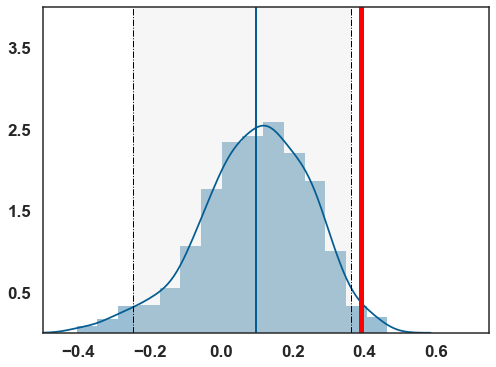

In [140]:
plt_null('PC1', 'IRON_H', 'STR3_MOTOR_tfce_corrp_tstat_CP_2', 0.39, 1000, B[0],'b')

In [143]:
permute(df_PC1, 'IRON_H', 'STR3_MOTOR_tstat_CP_2mm', 'PC1',
                 GS_IRON_H, AHBA, npermutations = nperm)

Observed correlation between Delta-Chi and IRON_H= 0.3
Total Number of AHBA genes = 20199
Geneset of interest contains 12 genes
P_val 0.263442307358


P_val 0.263442307358


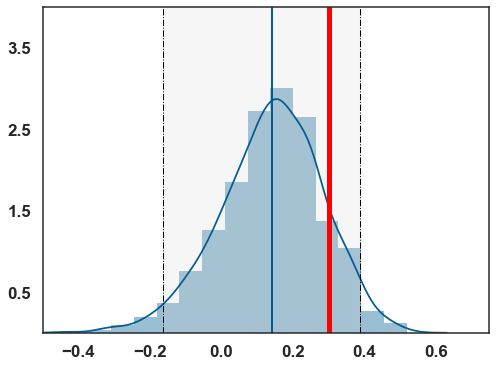

In [144]:
plt_null('PC1', 'IRON_H', 'STR3_MOTOR_tstat_CP_2mm', 0.3, 1000, B[0],'b')

In [118]:
permute(df_PC1, 'IRON_D', 'STR3_MOTOR_tfce_corrp_tstat_CP_2', 'PC1',
                 GS_IRON_D, AHBA, npermutations = nperm)

Observed correlation between Delta-Chi and IRON_D= 0.46
P_val 0.00659049339319


In [119]:
permute(df_PC2, 'IRON_T2', 'STR3_MOTOR_tfce_corrp_tstat_CP_2', 'PC1',
                 GS_IRON_T2, AHBA, npermutations = nperm)

Observed correlation between Delta-Chi and IRON_T2= 0.15
P_val 0.729074238042


In [120]:
permute(df_PC1, 'FERRITIN', 'STR3_MOTOR_tfce_corrp_tstat_CP_2', 'PC1',
                 GS_FERRITIN, AHBA, npermutations = nperm)

Observed correlation between Delta-Chi and FERRITIN= 0.5
Total Number of AHBA genes = 14991
Geneset of interest contains 7 genes
P_val 0.00450627569357


# STR3_LIMBIC

In [39]:
nperm = 10000

In [40]:
permute(df_PC1, 'IRON_H', 'STR3_LIMBIC_tfce_corrp_tstat_CP_2', 'PC1',
                 GS_IRON_H, AHBA, npermutations = nperm)

Observed correlation between Delta-Chi and IRON_H= 0.16
Total Number of AHBA genes = 14984
Geneset of interest contains 12 genes
P_val 0.179788086568


In [41]:
permute(df_PC1, 'IRON_D', 'STR3_LIMBIC_tfce_corrp_tstat_CP_2', 'PC1',
                 GS_IRON_D, AHBA, npermutations = nperm)

Observed correlation between Delta-Chi and IRON_D= -0.12
Total Number of AHBA genes = 14978
Geneset of interest contains 17 genes
P_val 0.311388518763


In [42]:
permute(df_PC1, 'IRON_T2', 'STR3_LIMBIC_tfce_corrp_tstat_CP_2', 'PC1',
                 GS_IRON_T2, AHBA, npermutations = nperm)

Observed correlation between Delta-Chi and IRON_T2= 0.25
Total Number of AHBA genes = 14962
Geneset of interest contains 36 genes
P_val 0.0341679763597


In [43]:
permute(df_PC1, 'FERRITIN', 'STR3_LIMBIC_tfce_corrp_tstat_CP_2', 'PC1',
        GS_IRON_T2, AHBA, npermutations = nperm)

Observed correlation between Delta-Chi and FERRITIN= 0.12
Total Number of AHBA genes = 14962
Geneset of interest contains 36 genes
P_val 0.108540711516


# STR3_EXECUTIVE

In [44]:
permute(df_PC1, 'IRON_H', 'STR3_EXEC_tfce_corrp_tstat_CP_2', 'PC1',
                 GS_IRON_H, AHBA, npermutations = nperm)

Observed correlation between Delta-Chi and IRON_H= 0.12
Total Number of AHBA genes = 14984
Geneset of interest contains 12 genes
P_val 0.530054352154


In [45]:
permute(df_PC1, 'IRON_D', 'STR3_EXEC_tfce_corrp_tstat_CP_2', 'PC1',
                 GS_IRON_D, AHBA, npermutations = nperm)

Observed correlation between Delta-Chi and IRON_D= 0.23
Total Number of AHBA genes = 14978
Geneset of interest contains 17 genes
P_val 0.203397541628


In [46]:
permute(df_PC1, 'IRON_T2', 'STR3_EXEC_tfce_corrp_tstat_CP_2', 'PC1',
                 GS_IRON_T2, AHBA, npermutations = nperm)

Observed correlation between Delta-Chi and IRON_T2= -0.09
Total Number of AHBA genes = 14962
Geneset of interest contains 36 genes
P_val 0.816360540918


In [47]:
permute(df_PC1, 'FERRITIN', 'STR3_EXEC_tfce_corrp_tstat_CP_2', 'PC1',
        GS_IRON_T2, AHBA, npermutations = nperm)

Observed correlation between Delta-Chi and FERRITIN= 0.05
Total Number of AHBA genes = 14962
Geneset of interest contains 36 genes


KeyboardInterrupt: 

# False Discovery rate multiple comparison corretion 




# PLOT permutations 

In [114]:

def plt_null(dftype, met1 ,met2,observed_correlation, npermutations, color1, color2):
    
    
    null_distribution = np.load(os.path.join(ahba_dir, 'PERMUTATIONS' ,'null_nperm_%s_%s_%s_%s.npy' 
                                %(npermutations, dftype, met2[0:8], met1)))
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    #sns.set(style="white", palette="muted", color_codes=True)
    sns.set_style("white")
    g = sns.distplot(null_distribution, color=color1, hist=1, bins = 15)

    plt.axvline(np.mean(null_distribution), color=color1, linestyle='solid',linewidth=2)
    plt.axvline(np.percentile(null_distribution, 2.5), color='k', linestyle='-.', linewidth=1)
    plt.axvline(np.percentile(null_distribution, 97.5), color='k', linestyle='-.', linewidth=1)
    plt.axvspan(np.percentile(null_distribution, 2.5),np.percentile(null_distribution, 97.5) , alpha=0.2, color='lightgray')
    plt.axvline(observed_correlation, color='r', linestyle='solid', linewidth=5)
    plt.yticks([0.5,1.5,2.5,3.5])
    plt.xlim(-.5,.75)
    plt.ylim(0,4)
    plt.xticks(fontsize=17, weight='bold')
    plt.yticks(fontsize=17, weight='bold')
    plt.tick_params(axis='x', pad=12)
    plt.tick_params(axis='y', pad=12)
    plt.setp(ax.spines.values(), linewidth=1.5)

    #plt.savefig(os.path.join(save_fig_dir, 'permute_CHI_%s_%s'%(met1,met2)), dpi = 300, bbox_inches='tight', transparent=1)

    right = np.sum(np.array([np.abs(i) for i in null_distribution if i > observed_correlation]))
    xsum  = np.sum(np.abs(np.array(null_distribution)))
    p_val = right/xsum
    print 'P_val',np.array(p_val)


P_val 0.0427451568958


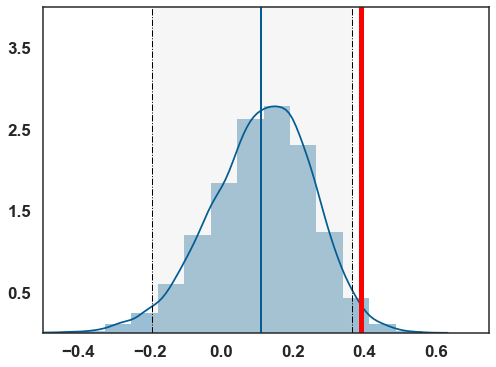

In [256]:
plt_null('PC1', 'IRON_H', 'STR3_MOTOR_tfce_corrp_tstat_CP_2', 0.39, 10000, B[0],'b')

P_val 0.00659049339319


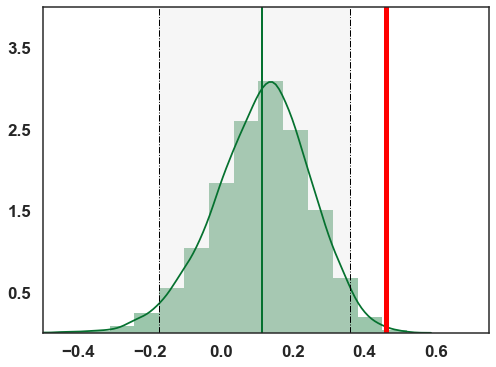

In [257]:
plt_null('PC1', 'IRON_D', 'STR3_MOTOR_tfce_corrp_tstat_CP_2', 0.46, 10000, G[0],'b')

P_val 0.0844020237781


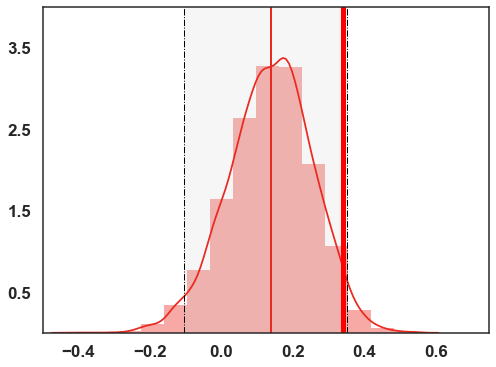

In [258]:
plt_null('PC1', 'IRON_T2', 'STR3_MOTOR_tfce_corrp_tstat_CP_2', 0.34, 10000, R[1],'b')

P_val 0.00450627569357


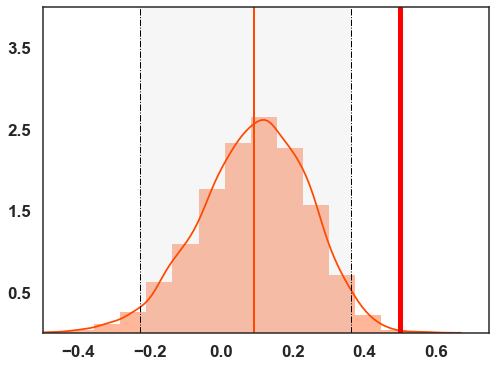

In [259]:
plt_null('PC1', 'FERRITIN', 'STR3_MOTOR_tfce_corrp_tstat_CP_2', 0.5, 10000, A[1],'b')